# Task 1

**Import relevant libraries**




In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_validate

**Load and Check Data**

In [4]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz**

Enter the feature you want to see the distribution: bmi


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


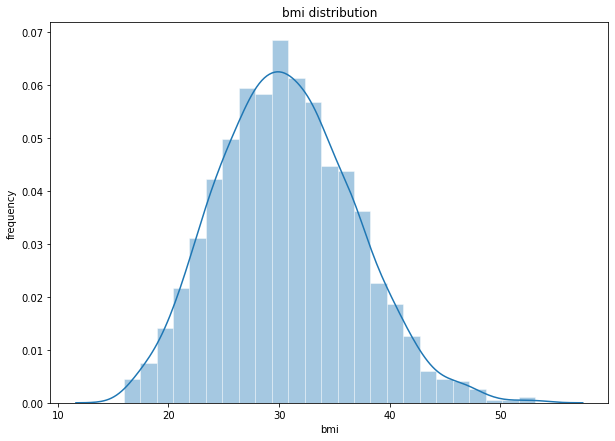

In [7]:
feature = input("Enter the feature you want to see the distribution: ") #bmi
def dist_plot(feature,figsize):
  plt.figure(figsize = figsize)
  plt.title(str(feature) + " distribution")
  plt.xlabel(str(feature))
  plt.ylabel("frequency")
  sns.set_theme()
  sns.distplot(df[feature])
  plt.show()
  
dist_plot(feature,figsize = (10,7))

**“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz**

Enter the feature: smoker


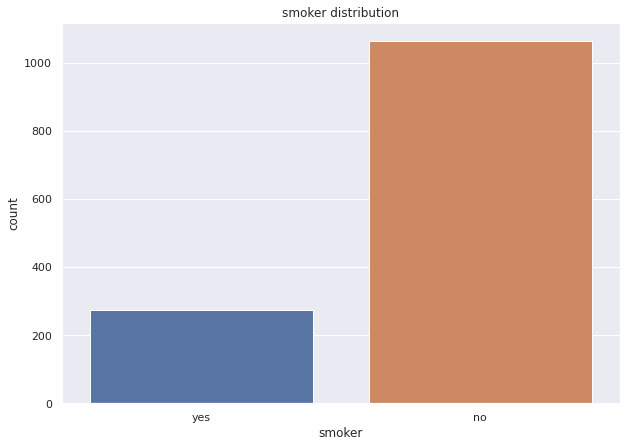

In [8]:
feature = input("Enter the feature: ") #smoker
def count_plot(feature,figsize):
  plt.figure(figsize = figsize)
  plt.title(str(feature) + " distribution")
  plt.xlabel(str(feature))
  plt.ylabel("frequency")
  sns.set_theme()
  sns.countplot(data = df, x = feature)
  plt.show()
  
count_plot(feature,figsize = (10,7))

Enter the first feature whose relationship will be examined: smoker
Enter the second attribute whose relationship will be examined: charges


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


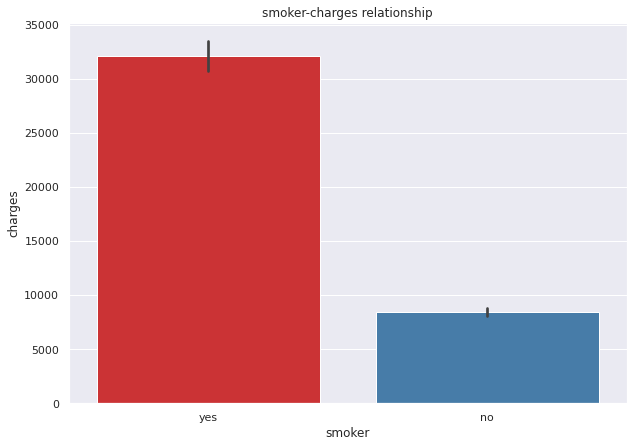

In [9]:
fea_1 = input("Enter the first feature whose relationship will be examined: ") #smoker
fea_2 = input("Enter the second attribute whose relationship will be examined: ") #charges

def bar_plot(fea_1,fea_2,figsize):
  plt.figure(figsize = figsize)
  plt.title(str(fea_1) + "-" + str(fea_2) + " relationship")
  plt.xlabel(str(fea_1))
  plt.ylabel(str(fea_2))
  sns.set_theme()
  sns.barplot(df[fea_1],df[fea_2], palette = "Set1")
  plt.show()
  
bar_plot(fea_1,fea_2,figsize = (10,7))

**“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.**

Enter the first feature whose relationship will be examined: smoker
Enter the second attribute whose relationship will be examined: region


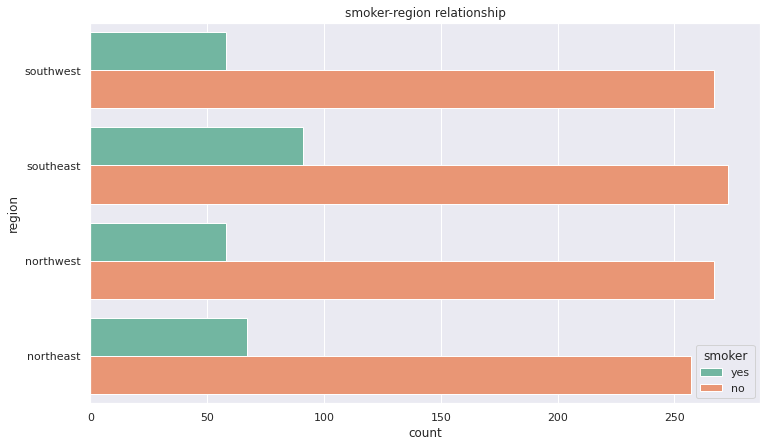

<Figure size 864x504 with 0 Axes>

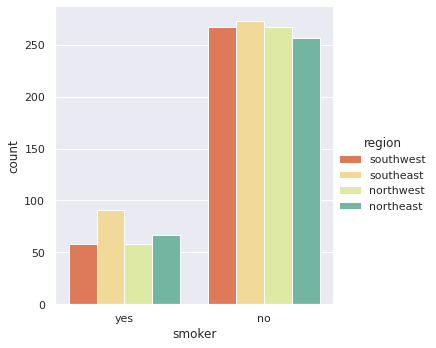

In [10]:
fea_1 = input("Enter the first feature whose relationship will be examined: ") #smoker
fea_2 = input("Enter the second attribute whose relationship will be examined: ") #region

def ycount_plot(fea_1,fea_2,figsize):
  plt.figure(figsize = figsize)
  plt.title(str(fea_1) + "-" + str(fea_2) + " relationship")
  plt.xlabel(fea_1)
  plt.ylabel(fea_2)
  sns.set_theme()
  sns.countplot(y = fea_2, hue = fea_1, data = df, palette = "Set2")
  plt.show()

# cat plot
def cat_plot(fea_1,fea_2,figsize):
  plt.figure(figsize = figsize)
  sns.catplot(x=fea_1, kind="count",hue = fea_2, palette="Spectral", data = df)
  
ycount_plot(fea_1, fea_2,figsize = (12,7))
cat_plot(fea_1, fea_2,figsize = (12,7))


In [11]:
df[fea_1].groupby(df[fea_2]).value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

**“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**

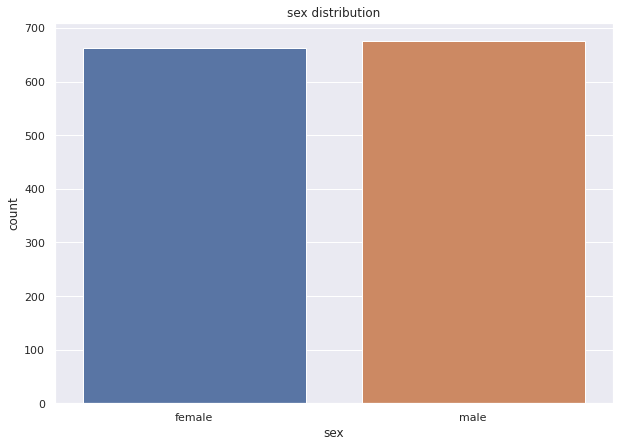

In [12]:
count_plot(feature = 'sex',figsize = (10,7))

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


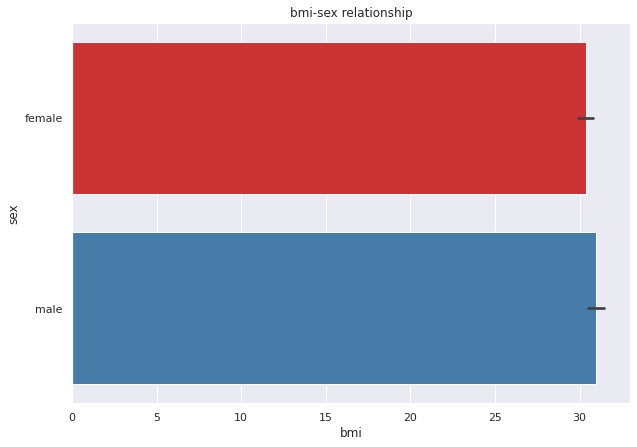

In [14]:
bar_plot(fea_1 = 'bmi', fea_2 = 'sex',figsize = (10,7))

In [15]:
#min,max,sum,mean for f/m
df.groupby("sex")["bmi"].agg([min, max, sum, np.mean])

,min,max,sum,mean
sex,,,,
female,16.815,48.07,20110.070,30.377749
male,15.960,53.13,20917.555,30.943129


**En çok “children”’a sahip “region”’ı bulunuz.**

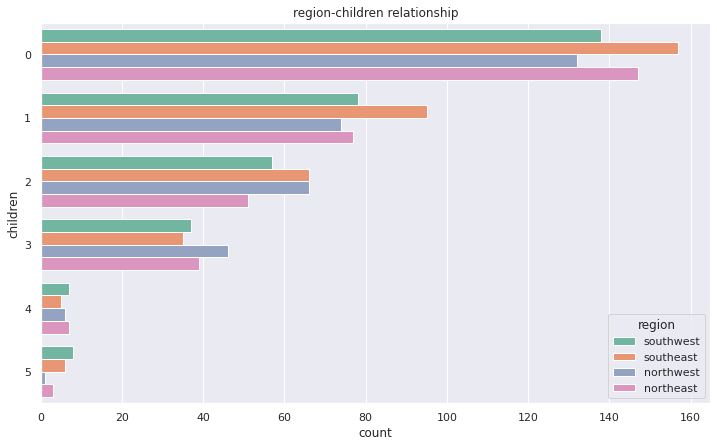

In [16]:
ycount_plot("region", "children",figsize = (12,7))

In [17]:
df.groupby('region')[['children']].sum()

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


In [18]:
df.groupby('region')[['children']].sum().idxmax(axis=0)

children    southeast
dtype: object

**“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


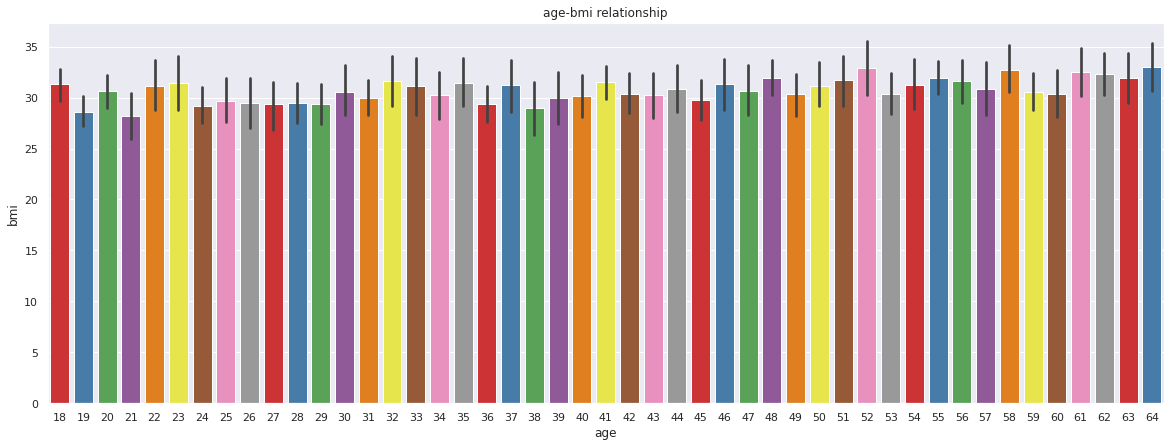

In [19]:
bar_plot('age','bmi',figsize = (20,7))

Enter the first feature: age
Enter the second feature: bmi


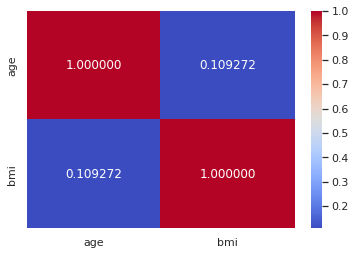

In [20]:
fea_1 = input("Enter the first feature: ") #age
fea_2 = input("Enter the second feature: ") #bmi

def correlation_matrix(fea_1,fea_2,figsize):
  nw_df = pd.DataFrame(df,columns=[fea_1,fea_2])
  corrMatrix = nw_df.corr()
  sns.heatmap(corrMatrix, cmap='coolwarm', fmt="f", annot=True)
  plt.show()

correlation_matrix(fea_1,fea_2,figsize = (12,7))

**“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.bm**

In [21]:
df.groupby("children")["bmi"].agg([min, max, sum, np.mean])

,min,max,sum,mean
children,,,,
0,15.960,53.13,17535.870,30.550296
1,16.815,52.58,9921.900,30.623148
2,16.815,48.07,7434.745,30.978104
3,18.905,46.53,4817.440,30.684331
4,24.415,41.47,784.780,31.391200
5,18.300,46.75,532.890,29.605000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


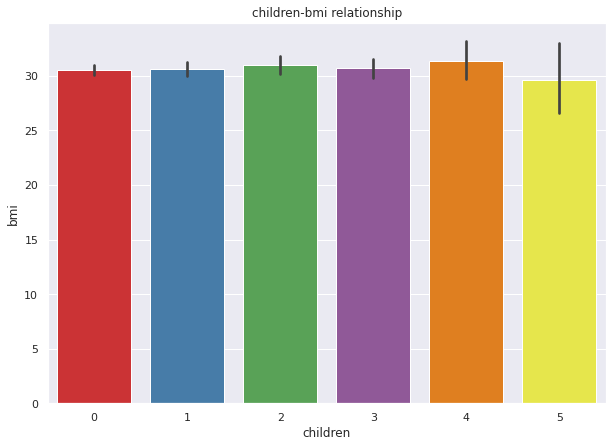

In [22]:
bar_plot(fea_1 = 'children', fea_2 = 'bmi',figsize = (10,7))

**“bmi” değişkeninde outlier var mıdır? İnceleyiniz.**

Enter the feature: bmi


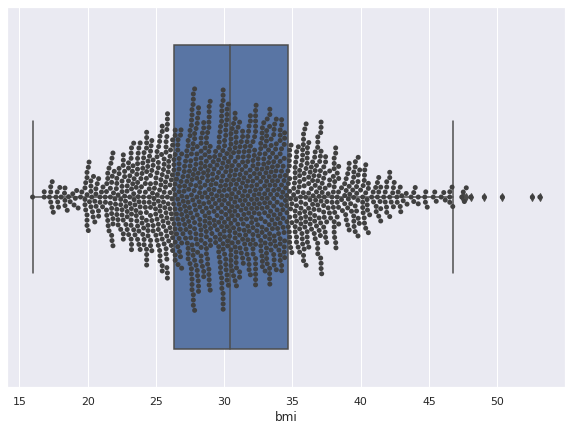

In [23]:
fea_1 = input("Enter the feature: ") #bmi

def box_plot(fea_1,df, figsize):
  plt.figure(figsize = figsize)
  sns.set_theme()
  sns.boxplot(x=fea_1, data=df)
  sns.swarmplot(x=fea_1, data=df, color=".25")
  plt.show()

box_plot(fea_1,df, figsize=(10,7))

In [24]:
import time
fea_1 = input("Enter the feature: ") #bmi
print (f'Feature Name: {fea_1}')
def outlier_detector(fea_1):
  Q1 = df[fea_1].quantile(0.25)
  Q3 = df[fea_1].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  #df[fea_1] < (lower_limit)
  lower_outliers_cnt = df[df[fea_1] < (lower_limit)][fea_1].count()
  upper_outliers_cnt = df[df[fea_1] > upper_limit][fea_1].count()
  print("*************************\nThe number of lower outliers: {}\nThe number of upper outliers: {}\n*************************".format(lower_outliers_cnt,upper_outliers_cnt))
  time.sleep(1)
  print("Q1: {}\n Q3: {}\n Lower limit: {}\n Upper Limit: {}\n Interquartile Range (IQR): {}".format(Q1, Q3,lower_limit,upper_limit, IQR))
  time.sleep(1)
  outlier_idx = df[((df[fea_1] < (lower_limit)) |(df[fea_1] > (upper_limit)))].index
  nw_df = df[~((df[fea_1] < (lower_limit)) |(df[fea_1] > (upper_limit)))]
  nw_df.reset_index(inplace = True)
  print("*************************\nOutliers indexes: {}\n*************************".format(outlier_idx))
  time.sleep(1)
  print("Medical Cost Personal Datasets without Outliers")
  return nw_df

outlier_detector(fea_1)

Enter the feature: bmi
Feature Name: bmi
*************************
The number of lower outliers: 0
The number of upper outliers: 9
*************************
Q1: 26.29625
 Q3: 34.69375
 Lower limit: 13.7
 Upper Limit: 47.290000000000006
 Interquartile Range (IQR): 8.3975
*************************
Outliers indexes: Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')
*************************
Medical Cost Personal Datasets without Outliers


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


*************************
The number of lower outliers: 0
The number of upper outliers: 9
*************************
Q1: 26.29625
 Q3: 34.69375
 Lower limit: 13.7
 Upper Limit: 47.290000000000006
 Interquartile Range (IQR): 8.3975
*************************
Outliers indexes: Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')
*************************
Medical Cost Personal Datasets without Outliers


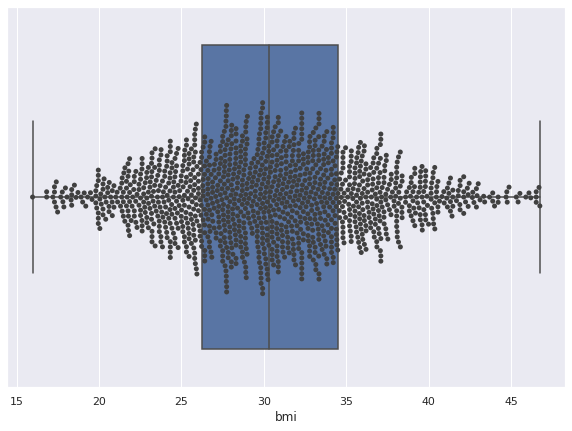

In [25]:
nw_df = outlier_detector(fea_1)
box_plot(fea_1,nw_df, figsize=(10,7))

**“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.**

Enter the first feature whose relationship will be examined: charges
Enter the second attribute whose relationship will be examined: bmi


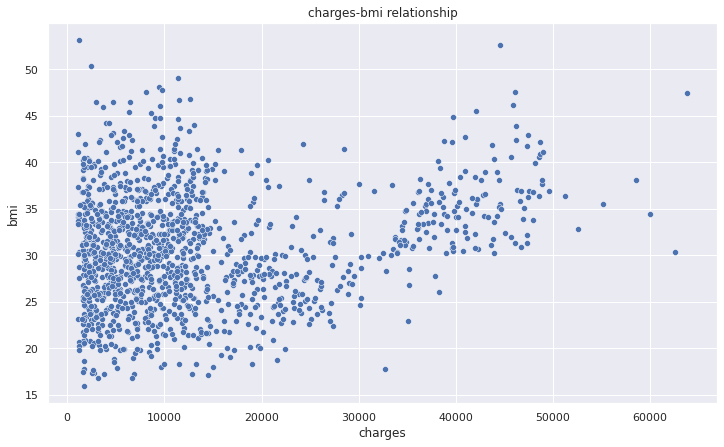

In [26]:
fea_1 = input("Enter the first feature whose relationship will be examined: ") #charges
fea_2 = input("Enter the second attribute whose relationship will be examined: ") #bmi

def scatter_plot(fea_1,fea_2,figsize):
  plt.figure(figsize = figsize)
  plt.title(str(fea_1) + "-" + str(fea_2) + " relationship")
  plt.xlabel(fea_1)
  plt.ylabel(fea_2)
  sns.set_theme()
  sns.scatterplot(x=fea_1, y=fea_2, data=df)
  plt.show()

scatter_plot(fea_1,fea_2,figsize=(12,7))

**“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

Enter the first feature whose relationship will be examined: region
Enter the second attribute whose relationship will be examined: charges
Enter the third attribute whose relationship will be examined: smoker


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


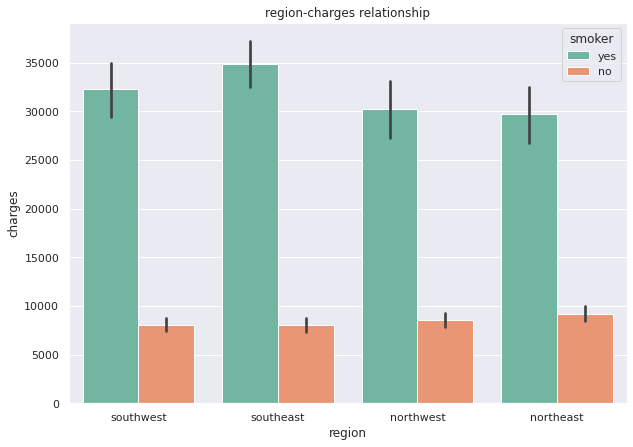

In [27]:
fea_1 = input("Enter the first feature whose relationship will be examined: ") #region
fea_2 = input("Enter the second attribute whose relationship will be examined: ") #charges
fea_3 = input("Enter the third attribute whose relationship will be examined: ") #smoker

def bar_plot(fea_1,fesa_2,fea_3, figsize):
  plt.figure(figsize = figsize)
  plt.title(str(fea_1) + "-" + str(fea_2) + " relationship")
  plt.xlabel(str(fea_1))
  plt.ylabel(str(fea_2))
  sns.set_theme()
  sns.barplot(df[fea_1],df[fea_2],hue=df[fea_3], palette = "Set2")
  plt.show()
  
bar_plot(fea_1,fea_2,fea_3, figsize = (10,7))

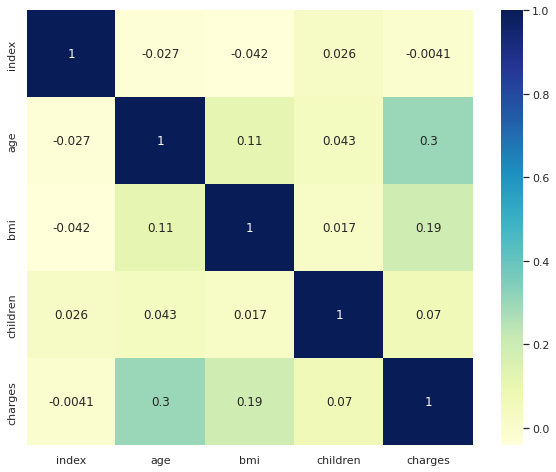

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(nw_df.corr(), annot=True, cmap = 'YlGnBu')

# Task 2

**Import relevant libraries**

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import RidgeCV, LassoCV,Lasso, ElasticNet,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, accuracy_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from lightgbm import LGBMRegressor
#from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
import warnings

warnings.filterwarnings('ignore')


## Preparing dataset for machine learning model


In [30]:
# our dataset
nw_df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
# categorical data in our dataset
obj = nw_df.select_dtypes(include=[object])
obj.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [32]:
df_obj = pd.get_dummies(obj, drop_first=True)
df_obj

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1324,1,0,1,0,0
1325,0,0,0,0,0
1326,0,0,0,1,0
1327,0,0,0,0,1


In [33]:
nw_df = nw_df.drop(obj.columns, axis=1)
nw_df

,index,age,bmi,children,charges
0,0,19,27.900,0,16884.92400
1,1,18,33.770,1,1725.55230
2,2,28,33.000,3,4449.46200
3,3,33,22.705,0,21984.47061
4,4,32,28.880,0,3866.85520
...,...,...,...,...,...
1324,1333,50,30.970,3,10600.54830
1325,1334,18,31.920,0,2205.98080
1326,1335,18,36.850,0,1629.83350
1327,1336,21,25.800,0,2007.94500


In [34]:
nw_df = pd.concat([nw_df,df_obj],axis=1)
nw_df = nw_df.drop('index',axis=1)
nw_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1324,50,30.970,3,10600.54830,1,0,1,0,0
1325,18,31.920,0,2205.98080,0,0,0,0,0
1326,18,36.850,0,1629.83350,0,0,0,1,0
1327,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
# drop duplicate columns from dataset if have 
nw_df = nw_df.T.drop_duplicates().T
nw_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1324,50.0,30.970,3.0,10600.54830,1.0,0.0,1.0,0.0,0.0
1325,18.0,31.920,0.0,2205.98080,0.0,0.0,0.0,0.0,0.0
1326,18.0,36.850,0.0,1629.83350,0.0,0.0,0.0,1.0,0.0
1327,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,1.0


In [36]:
# Standardization
#st = StandardScaler()
#nw_df2 = pd.DataFrame(st.fit_transform(nw_df))
#nw_df2.columns = nw_df.columns
#nw_df2
# MinMax scaler
#ms = MinMaxScaler()
#nw_df3 = pd.DataFrame(ms.fit_transform(nw_df))
#nw_df3.columns = nw_df.columns
#nw_df3

In [37]:
y = nw_df['charges']
X = nw_df.drop('charges',axis=1)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1324,50.0,30.970,3.0,1.0,0.0,1.0,0.0,0.0
1325,18.0,31.920,0.0,0.0,0.0,0.0,0.0,0.0
1326,18.0,36.850,0.0,0.0,0.0,0.0,1.0,0.0
1327,21.0,25.800,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
print(f'x_train shape: {X_train.shape}\n, y_train shape: {y_train.shape}\n, X_test shape {X_test.shape}\n, y_test shape: {y_test.shape}')

x_train shape: (1063, 8)
, y_train shape: (1063,)
, X_test shape (266, 8)
, y_test shape: (266,)


In [84]:
def evaluate_model(model, X_test, y_test):
  print('**********************************************************************************')
  y_pred = model.predict(X_test)
  #print(f'Estimator which gave the highest score: {model.best_estimator_}')
  #print(f'Mean cross-validated score of the best_estimator: {model.best_score_}')
  print(f'MSE: {mean_squared_error(y_test,y_pred)}\n MAE: {mean_absolute_error(y_test,y_pred)}\n RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
  
  print(f'Coefficient of determination: {r2_score(y_test,y_pred)}') # test score

  print('**********************************************************************************')


In [40]:
#all_accuracies = dict()

In [41]:
regName = []
regCVScore = []

## 📈 Linear Regression

In [42]:
lr = LinearRegression()

In [43]:
lrScores = cross_validate(lr,X_train, y_train, scoring='r2', cv=5)
regName.append('Multiple Linear Regression')
regCVScore.append(lrScores['test_score'].mean() * 100)

## 📈 Decision Tree Regression 🌳

In [44]:
dc = DecisionTreeRegressor()

In [45]:
dcScores = cross_validate(dc,X_train, y_train, scoring='r2', cv=5)
regName.append('Decision Tree Regression')
regCVScore.append(dcScores['test_score'].mean() * 100)

## 📈 Random Forest Regression

In [47]:
rf = RandomForestRegressor()

In [48]:
rfScores = cross_validate(rf,X_train, y_train, scoring='r2', cv=5)
regName.append('Random Forest Regression')
regCVScore.append(rfScores['test_score'].mean() * 100)

## 📈 Ridge Regression

In [50]:
ridge = Ridge()

In [51]:
ridgeScores = cross_validate(ridge,X_train, y_train, scoring='r2', cv=5)
regName.append('Ridge Regression')
regCVScore.append(ridgeScores['test_score'].mean() * 100)

In [52]:
# Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
sc_X_test = sc_X.transform(X_test)
sc_y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

## 📈 Lasso Regression

In [53]:
# will scale
ls = Lasso()

In [54]:
lsScores = cross_validate(ls,sc_X_train, sc_y_train, scoring='r2', cv=5)
regName.append('Lasso Regression')
regCVScore.append(lsScores['test_score'].mean() * 100)

## 📈 K-Nearest Neighbors Regression

In [55]:
# will scale
knn = KNeighborsRegressor()

In [56]:
knnScores = cross_validate(knn,sc_X_train, sc_y_train, scoring='r2', cv=5)
regName.append('KNN Regression')
regCVScore.append(knnScores['test_score'].mean() * 100)

## 📈 Support Vector Regression

In [57]:
from sklearn.svm import SVR
svrRegressor = SVR(kernel = 'rbf')

In [58]:
svrScores = cross_validate(svrRegressor,sc_X_train, sc_y_train.ravel(), scoring='r2', cv=5)
regName.append('SVR')
regCVScore.append(svrScores['test_score'].mean() * 100)

## Results

In [75]:
data = pd.DataFrame({'Regressor' : regName, 'Score' : regCVScore})
data.sort_values(by = ['Score'], ascending = False).style.highlight_max(subset = ['Score'], color = 'lightgreen', axis = 0)

,Regressor,Score
2,Random Forest Regression,83.422648
6,SVR,83.053635
5,KNN Regression,77.490245
3,Ridge Regression,73.793803
0,Multiple Linear Regression,73.785944
1,Decision Tree Regression,70.135186
4,Lasso Regression,-0.497566


## Grid Search

In [76]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [77]:
gridSearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 5, n_jobs = -1, verbose = 2)
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [78]:
gridSearch.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [79]:
grid_rf = RandomForestRegressor(bootstrap = True, max_depth=90, max_features=3, min_samples_leaf= 3, min_samples_split=8, n_estimators = 1000)

In [80]:
grid_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [85]:
evaluate_model(grid_rf, X_test, y_test)

**********************************************************************************
MSE: 21004138.40265785
 MAE: 2662.4368443160593
 RMSE: 4583.027209460779
Coefficient of determination: 0.8582089057647206
**********************************************************************************
